## Computing with Language: Statistics

In [1]:
import nltk

# make sure that NLTK language resources have been downloaded 
# (see "NLTK Introduction" notebook)

from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### [Word] Frequency Distributions

FreqDist is used to encode "frequency distributions", which count the number of times that each outcome of an experiment occurs.
* In case of text, its frequency distribution will contains counts of all tokens that appear in the text.
* Technically: FreqDist() creates a Python object (that holds information about a frequency distribution)

In [2]:
# frequency distribution of text1
fdist1 = FreqDist(text1)

print(fdist1)

<FreqDist with 19317 samples and 260819 outcomes>


**FreqDist** methods:

* freq(sample) - returns the number of times "sample" appears in FreqDist
* hapaxes() - a list of samples that appear only once
* max() - the sample with the maximum number of occurences
* plot() - plot a FreqDist chart
* pprint() - "pretty print" the first items of FreqDist

NLTK book: http://www.nltk.org/book/ch01.html#computing-with-language-simple-statistics

Full list of methods: http://www.nltk.org/api/nltk.html#nltk.probability.FreqDist

In [3]:
# print frequency distribution (top results)

fdist1.pprint()

FreqDist({',': 18713, 'the': 13721, '.': 6862, 'of': 6536, 'and': 6024, 'a': 4569, 'to': 4542, ';': 4072, 'in': 3916, 'that': 2982, ...})


In [4]:
# max()

fdist1.max()

','

In [5]:
# freq()

print("','  :", fdist1.freq(","))
print("whale:", fdist1.freq("whale"))

','  : 0.07174707364110744
whale: 0.003473673313677301


---

Information about Python dictionaries: 
* ["Dictionaries and Structuring Data"](https://automatetheboringstuff.com/chapter5/)


In [6]:
# output of fdist1.pprint() looks like a Python "dictionary"

# can we look up its values by a given "key"?
fdist1["whale"]

906

In [7]:
# top 10 results (not that interesting for text)
# so nltk builds upon Counter type object
fdist1.most_common(10)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982)]

In [10]:
type(fdist1) #strongly suspect that theres is a Counter like dictionary lurking down there

nltk.probability.FreqDist

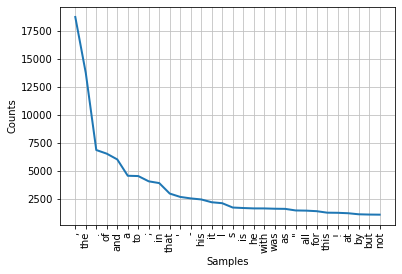

In [11]:
%matplotlib inline

# plot the distribution
fdist1.plot(30)

In [13]:
import plotly.graph_objects as go
tuples = fdist1.most_common(50)
x = [t[0] for t in tuples]
y = [t[1] for t in tuples]

# fig = go.Figure(data=go.Scatter(x=x, y=y))
fig = go.Figure(data=go.Bar(x=x, y=y))
fig.show()

In [14]:
import string
tuples = fdist1.most_common(100)
tuples = [t for t in tuples if t[0] not in string.punctuation] # so we do not want any punctuation in results
x = [t[0] for t in tuples]
y = [t[1] for t in tuples]

# fig = go.Figure(data=go.Scatter(x=x, y=y))
fig = go.Figure(data=go.Bar(x=x, y=y))
fig.show()

In [9]:
# most_common() returs a list -> we can "slice" it

my_list = fdist1.most_common(100)

# results 50 through 59
my_list[50:60]

[('The', 612),
 ('their', 612),
 ('are', 586),
 ('they', 586),
 ('an', 582),
 ('some', 578),
 ('then', 571),
 ('my', 564),
 ('when', 553),
 ('upon', 538)]

In [10]:
# least common results (first 10 examples)

fdist1.hapaxes()[:10]

['Herman',
 'Melville',
 ']',
 'ETYMOLOGY',
 'Late',
 'Consumptive',
 'School',
 'threadbare',
 'lexicons',
 'mockingly']

### Words can appear both in lowercase and Capitalized

Let's fix our FreqDist:

In [15]:
# need to "lowercase" the text before passing it to FreqDist
#   - see example in https://www.nltk.org/api/nltk.html#nltk.probability.FreqDist

fdist2 = FreqDist(word.lower() for word in text1) # so we normalize to lowercase

# we're going through the list of tokens in text,
#  - returning (generating) lowercase versions of these tokens
#  - and passing the result to FreqDist

In [16]:
# initial:
print(fdist1.freq("whale"))
print(fdist1.freq("Whale"))
print()

# fixed:
print(fdist2.freq("whale"))

0.003473673313677301
0.0010812095744558486

0.004700577795329328


### Cleaning data: removing stopwords

NLTK contains a corpus of *stopwords* - high-frequency words like "the", "to" and "also" - that we may want to filter out of a document before further processing.

Stopwords usually have little lexical content, and their presence in a text fails to distinguish it from other texts.

https://www.nltk.org/book/ch02#wordlist-corpora

In [19]:
from nltk.corpus import stopwords

# English stopwords
stop_words = stopwords.words("english")

stop_words[:8]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']

In [20]:
# let's start with text1 in lowercase

# return a list  
#   containing "word.lower()"
#     for every item (stored in variable "word")
#       in resource "text1"

text = [word.lower() for word in text1]

text[:7]

['[', 'moby', 'dick', 'by', 'herman', 'melville', '1851']

**NLTK book: [4.2   Operating on Every Element](https://www.nltk.org/book/ch01#operating-on-every-element)**

This *pattern* – doing something (e.g. modifying) with every item in a sequence and returning a list of results – is called Python *list comprehension*:
    
`result_list = [item.do_something() for item in list]`

List comprehensions may also contain conditions (only items matching the condition will be included in the resulting list):

`result_list = [item.do_something() for item in list `**`if`**` condition]`

It is very useful for filtering and modifying lists.

In [21]:
# we can filter either (a) text before calling FreqDist or (b) results of FreqDist.
# let's filter before calling FreqDist.

# create a set of stopwords (operations with sets are faster that with lists)
stop_set = set(stop_words)

# filter out stopwords (return only words not in the stoplist)
without_stopwords = [word for word in text if word not in stop_set]

text[:7]

['[', 'moby', 'dick', 'by', 'herman', 'melville', '1851']

In [23]:
# let's also filter out tokens that are not text or numbers

# Python has a built-in method .isalnum() that determines 
# if a string only consists of letters or digits:

# https://docs.python.org/3/library/stdtypes.html#str.isalnum

filtered = [word for word in without_stopwords if word.isalnum()]

filtered[:7]

['moby', 'dick', 'herman', 'melville', '1851', 'etymology', 'supplied']

In [24]:
# word frequency

freq = FreqDist(filtered)

freq.most_common(15)

[('whale', 1226),
 ('one', 921),
 ('like', 647),
 ('upon', 566),
 ('man', 527),
 ('ship', 518),
 ('ahab', 511),
 ('ye', 472),
 ('sea', 455),
 ('old', 450),
 ('would', 432),
 ('though', 384),
 ('head', 345),
 ('yet', 345),
 ('boat', 336)]

### Exploring data: finding interesting words

NLTK also includes a list of common English words. We can use it to find unusual or mis-spelt words in a text corpus.

See also: https://www.nltk.org/book/ch02#code-unusual

In [26]:
common_word_list = nltk.corpus.words.words()

# convert word list to a set (+ convert words to lowercase)
word_set = set(word.lower() for word in common_word_list)

# filter out common words
uncommon = [word for word in filtered if word not in word_set]

uncommon[:7]

['moby', 'melville', '1851', 'supplied', 'lexicons', 'grammars', 'mockingly']

In [27]:
# word frequency

freq = FreqDist(uncommon)

freq.most_common(15)

[('ahab', 511),
 ('seemed', 283),
 ('whales', 268),
 ('queequeg', 252),
 ('pequod', 173),
 ('eyes', 156),
 ('boats', 147),
 ('things', 132),
 ('hands', 130),
 ('feet', 127),
 ('called', 116),
 ('heard', 110),
 ('years', 96),
 ('nantucket', 96),
 ('ships', 87)]

Note: in order to find really uncommon words we may need to clean data further (convert nouns to singular, etc.) or get a larger list of common words.

---

### Further information

[**Introduction to stylometry with Python**](https://programminghistorian.org/en/lessons/introduction-to-stylometry-with-python) by François Dominic Laramée
* uses FreqDist

Stylometry is the quantitative study of literary style through computational distant reading methods. It is based on the observation that authors tend to write in relatively consistent, recognizable and unique ways. 